<a href="https://colab.research.google.com/github/juanluishg/dataproject4_models/blob/main/ModeloUTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Cargamos librerías
import numpy as np
import pandas as pd 
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
print(os.listdir("/content/drive/MyDrive/UTKface_Aligned&cropped"))

['crop_part1.tar.gz', 'UTKFace.tar.gz']


In [3]:
# Descomprimimos

import tarfile

fname = "/content/drive/MyDrive/UTKface_Aligned&cropped/UTKFace.tar.gz"

if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
elif fname.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

In [4]:
# Cargamos y visualizamos Data

def imshow(img):
    plt.imshow(img, interpolation='bicubic')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

In [5]:
onlyfiles = os.listdir("UTKFace")
y = np.array([[[i.split('_')[0]],[i.split('_')[1]]] for i in onlyfiles])
# y = np.array([[i.split('_')[1] for i in onlyfiles]]).T
print(y.shape)
print(y[0])

(23708, 2, 1)
[['9']
 ['0']]


In [6]:
X_data =[]
for file in onlyfiles:
    face = cv2.imread("UTKFace/"+file)
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face =cv2.resize(face, (32,32) )
    X_data.append(face)
X_data=np.array(X_data)
X_data.shape

(23708, 32, 32, 3)

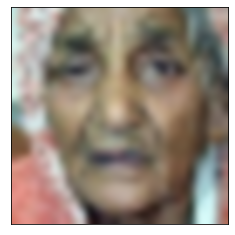

[['89']
 ['1']]


In [7]:
X = np.squeeze(X_data)
imshow(X[1])
print(y[1])

In [ ]:
# Contruimos modelo

def gen_model():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))
    x = inputs
    x = layers.Conv2D(32,3,activation='relu')(x)
    x = layers.Conv2D(32,3,activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Conv2D(64,3,activation='relu')(x)
    x = layers.Conv2D(64,3,activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Conv2D(84,3,activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Flatten()(x)
    x1 = layers.Dense(64,activation='relu')(x)
    x2 = layers.Dense(64,activation='relu')(x)
    x1 = layers.Dense(1,activation='sigmoid',name='sex_out')(x1)
    x2 = layers.Dense(1,activation='relu',name='age_out')(x2)
    model = tf.keras.models.Model(inputs=inputs, outputs=[x1, x2])
    model.compile(optimizer='Adam', loss=['binary_crossentropy','mae'])
    tf.keras.utils.plot_model(model, 'model.png',show_shapes=True)  
    return model
model=gen_model()

Image('model.png')

In [20]:
y=np.asarray(y,dtype=np.float64)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.33)

y_train=[y_train[:,1],y_train[:,0]]
y_test=[y_test[:,1],y_test[:,0]]



In [22]:
# Entrenamos modelo
import random
random_id=random.random()
model.summary()
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/'+str(random_id))]
model.fit(X_train, y_train, epochs=50,batch_size=240,validation_data=(X_test,y_test),callbacks=callbacks, shuffle=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 14, 14, 32)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [26]:
# Evaluamos modelo

model.evaluate(X_test,y_test)

245/245 [==============================] - 6s 24ms/step - loss: 8.1621 - sex_out_loss: 0.3347 - age_out_loss: 7.8274


[8.16212272644043, 0.3346896469593048, 7.827434062957764]

In [7]:
p_id=2
imshow(X_test[p_id])
print(y_test[0][p_id],y_test[1][p_id])
print(model.predict([[X_test[p_id]]]))

NameError: ignored